In [1]:
## IMPORT PACKAGES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# create dummy data and classifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# key metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# roc and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# f score 
from sklearn.metrics import f1_score
import seaborn as sns




In [2]:

## CREATE DUMMY DATA 

data_X, class_label = make_classification(n_samples = 1000, n_features = 5, n_classes = 2) # generates a random n-class classification problem
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3) # creates training and test sets


## CREATE DESCISION TREE

model = DecisionTreeClassifier() 
model.fit(trainX, trainy)


## CREATE NEW PREDICTIONS

predictions = model.predict_proba(testX)[:, 1] 


<AxesSubplot:>

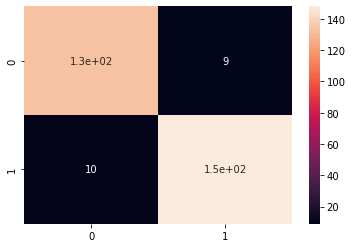

In [3]:

################# TASK 1 #################

## CALCULATE ACCURACY
accuracy_score(testy, predictions)

## CREATE CONFUSION MATRIX

cm = confusion_matrix(testy, predictions)

sns.heatmap(cm, annot=True)



In [ ]:

################# TASK 2 #################

## CALCUATE PRECISION, RECALL AND SPECIFICITY



In [ ]:

################# TASK 3 #################

## CALCULATE AUC

## PLOT ROC CURVE


In [ ]:
################# TASK 4 #################

## CALCULATE F SCORE 



In [ ]:
################# TASK 5 #################

data_X_mod2, class_label_mod2 = make_classification(n_samples = 1000, n_features = 5, n_classes = 2, flip_y = 0.5) 
trainX_mod2, testX_mod2, trainy_mod2, testy_mod2 = train_test_split(data_X_mod2, class_label_mod2, test_size=0.3)

model_mod2 = DecisionTreeClassifier() 
model_mod2.fit(trainX_mod2, trainy_mod2)

predictions_mod2 = model_mod2.predict_proba(testX_mod2)[:, 1] 
